<a href="https://colab.research.google.com/github/Henry-Medeiros/programming-challenge-3-Erik-C-55/blob/main/Programming_Challenge_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--2020-11-23 22:48:23--  https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 159777 (156K) [image/jpeg]
Saving to: ‘organisms.jpg.2’

organisms.jpg.2     100%[===================>] 156.03K  --.-KB/s    in 0.03s   

2020-11-23 22:48:24 (5.71 MB/s) - ‘organisms.jpg.2’ saved [159777/159777]



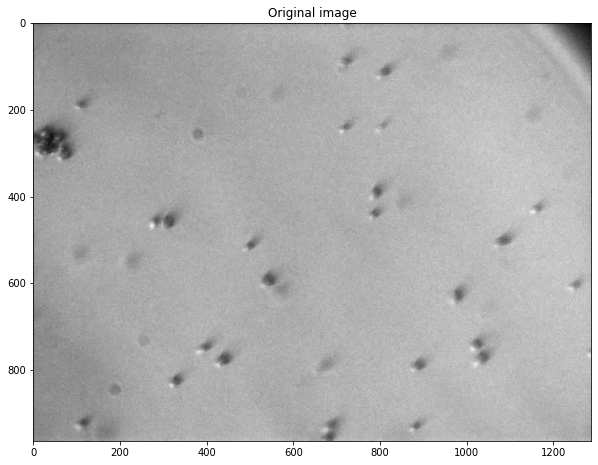

In [25]:
# The image below corresponds to a snapshot of single cell organisms observed with a microscope
import cv2
import matplotlib.pyplot as plt

!wget "https://raw.githubusercontent.com/Henry-Medeiros/images/master/organisms.jpg"
img = cv2.imread('organisms.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY, 0) 

# visualization only
plt.figure(figsize=(10,10)) # Added to increase figure size for viewing
plt.imshow(img, 'gray')
plt.title('Original image')
plt.show()

Text(0.5, 1.0, 'Binarized Image')

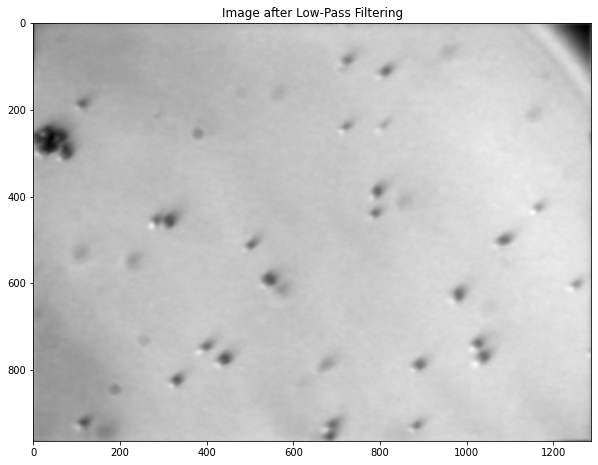

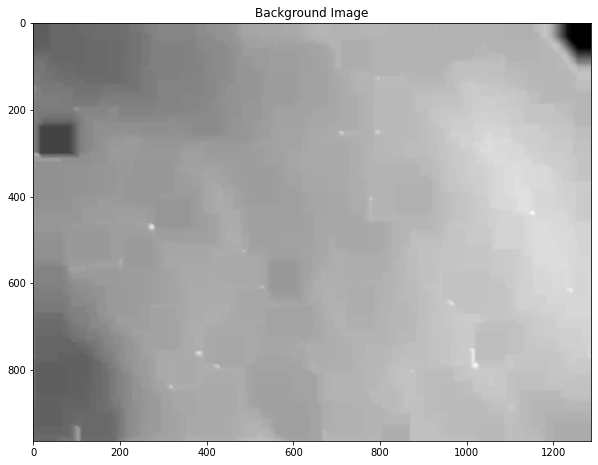

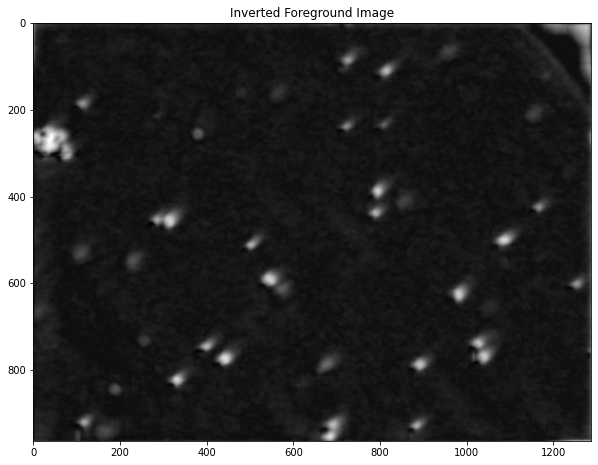

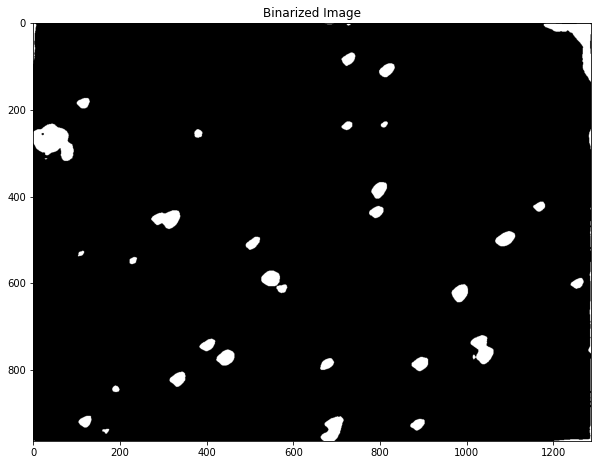

In [26]:
# Binarize the image to separate the organisms from the background
# Hint 1: You may need to remove some high-frequency noise from the image 
# before thresholding
# Hint 2: The background illumination in the image varies significantly, so a 
# single treshold for the entire will not work

import numpy as np
from skimage.exposure import equalize_adapthist
from skimage.filters import threshold_otsu
 
# Take the DFT of the image and shift it to faciliate filtering
imFFT = np.fft.fftshift(np.fft.fft2(img))
 
# To remove high-frequency noise, I will use a Gaussian LPF in the frequency domain. For now, I'm using a 2nd order Butterworth LPF with cutoff freq 2
filtOrder = 1
d0 = 50.0
dim = imFFT.shape
 
# Generate an empty filter mask of the same size as the image
Hfilt = np.zeros(imFFT.shape)
 
# Compute the center pixel location for the mask
x_center = dim[0]/2
y_center = dim[1]/2
 
# Compute values for the filter mask
for x in np.arange(0, dim[0]):
  for y in np.arange(0, dim[1]):
    dist = np.sqrt((x-x_center)**2.0 + (y-y_center)**2.0).astype(float)
    Hfilt[x,y] = 1/(1 + (dist/d0)**(2.0*filtOrder))
 
# Apply the filter mask through multiplication
filteredFFT = imFFT * Hfilt
 
# Shift the image back and compute the spatial domain image
imOut = np.fft.ifft2(np.fft.fftshift(filteredFFT))
 
# Take the magnitude of the output image
imOut = np.abs(imOut)
 
# Plot the filtered image
plt.figure(figsize=(10,10)) # Added to increase figure size for viewing
plt.imshow(imOut, 'gray')
plt.title('Image after Low-Pass Filtering')
 
# Obtain the background image by closing with a 60x60 structuring element
se = np.ones((60,60))
closedIm = cv2.morphologyEx(imOut, cv2.MORPH_CLOSE, se)
 
# Plot the background image
plt.figure(figsize=(10,10)) # Added to increase figure size for viewing
plt.imshow(closedIm, 'gray')
plt.title('Background Image')
 
# Since the desired objects are darker than the background, subtract the
# original image from the background image to get inverted foreground image
foreground = closedIm - imOut
 
# Plot the foreground image
plt.figure(figsize=(10,10)) # Added to increase figure size for viewing
plt.imshow(foreground, 'gray')
plt.title('Inverted Foreground Image')
 
# Get Otsu's threshold for the foreground image
thresh = threshold_otsu(foreground)
 
# Binarize the foreground image using Otsu's threshold
binarized = (foreground > thresh)*255
 
# Plot the binarized image
plt.figure(figsize=(10,10)) # Added to increase figure size for viewing
plt.imshow(binarized, 'gray')
plt.title('Binarized Image')

In [ ]:
# Locate and plot the organisms present in the image
# Hint 3: You will need to apply a morphological filter to your binarized image 
# to remove spurious pixels left over by the binarization step
# morphological filter to close the objects

In [ ]:
# Count the the number of organisms present in the image and compute their 
# average area in pixels